# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("house.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
X = df["sqft_living"]

In [5]:
y = df["price"]

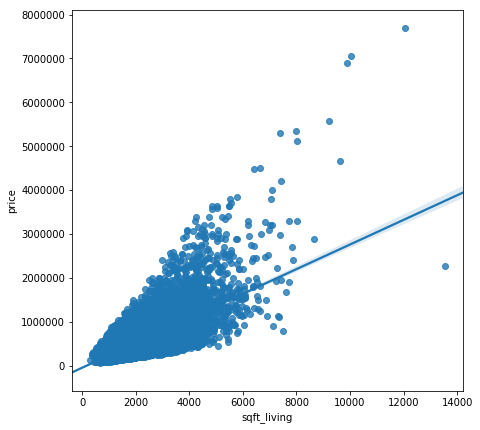

In [6]:
plt.figure(figsize=(7,7))
sns.regplot(data=df,x="sqft_living",y="price")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
# Split data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
lr = LinearRegression()

In [10]:
# Calculate coefficient and intercept
lr.fit(X_train.as_matrix().reshape((-1,1)),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
coefficient = lr.coef_
print(coefficient)

[273.80839877]


In [12]:
intercept = lr.intercept_
print(intercept)

-31356.784574860823


In [13]:
# predicted values
y_pred = lr.predict(X_test.as_matrix().reshape((-1,1)))

In [14]:
# Evaluating model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [15]:
mse = mean_squared_error(y_pred,y_test)
print(mse)

77554859321.6244


In [16]:
rmse = np.sqrt(mse)
print(rmse)

278486.7309615027


In [17]:
mae = mean_absolute_error(y_pred,y_test)
print(mae)

175221.70016269945


In [18]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.5030774643470592


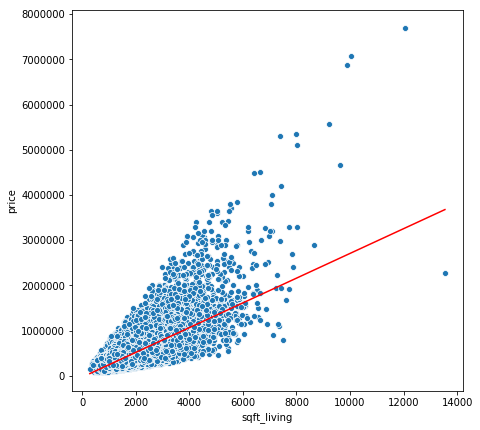

In [19]:
plt.figure(figsize=(7,7))
sns.scatterplot(X,y)
sns.lineplot(X_test,y_pred,color="red")
plt.show()